In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('cleaned_weather.csv')

In [ ]:
df.head()

,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1280.62,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,1280.29,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1281.97,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,1282.08,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81


In [ ]:
def explore_data(df):
  print(df.shape, "\n")
  print(df.info(), "\n")
  print(df.columns, "\n")
  print(df.isna().sum(), "\n")

explore_data(df)

(52696, 21) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      52696 non-null  object 
 1   p         52696 non-null  float64
 2   T         52696 non-null  float64
 3   Tpot      52696 non-null  float64
 4   Tdew      52696 non-null  float64
 5   rh        52696 non-null  float64
 6   VPmax     52696 non-null  float64
 7   VPact     52696 non-null  float64
 8   VPdef     52696 non-null  float64
 9   sh        52696 non-null  float64
 10  H2OC      52696 non-null  float64
 11  rho       52696 non-null  float64
 12  wv        52696 non-null  float64
 13  max. wv   52696 non-null  float64
 14  wd        52696 non-null  float64
 15  rain      52696 non-null  float64
 16  raining   52696 non-null  float64
 17  SWDR      52696 non-null  float64
 18  PAR       52696 non-null  float64
 19  max. PAR  52696 non-null  float64
 20  Tlog      5269

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

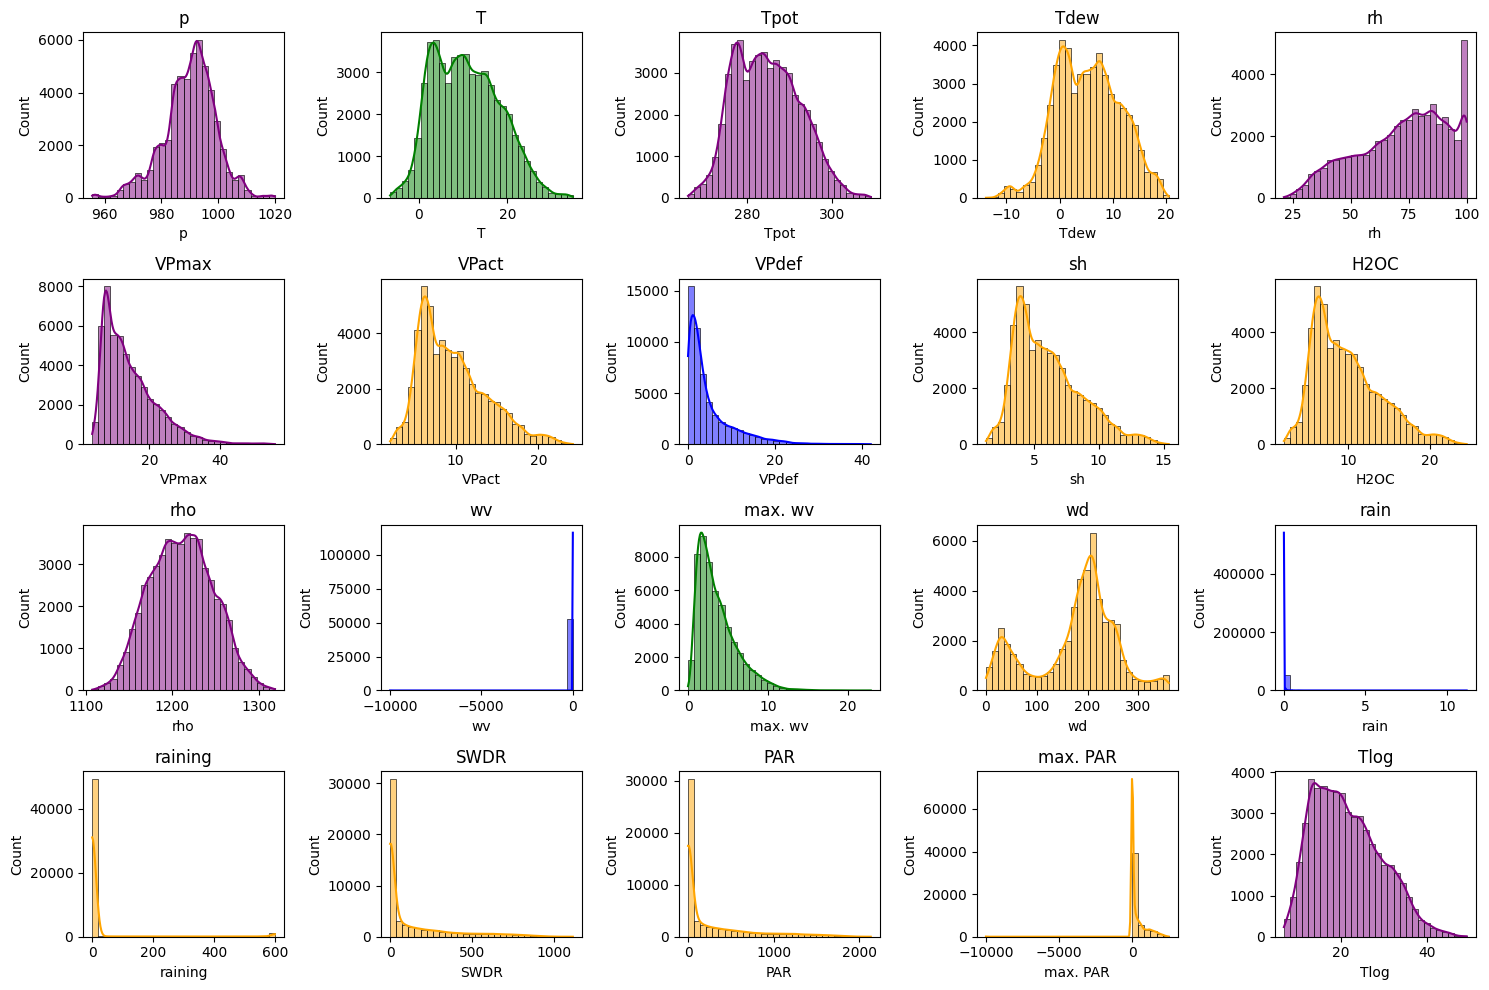

In [ ]:
# Plot distributions of all numeric features
numeric_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features.columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[col], kde=True, bins=30, color=np.random.choice(['blue', 'green', 'orange', 'purple']))
    plt.title(col)
plt.tight_layout()
plt.show()

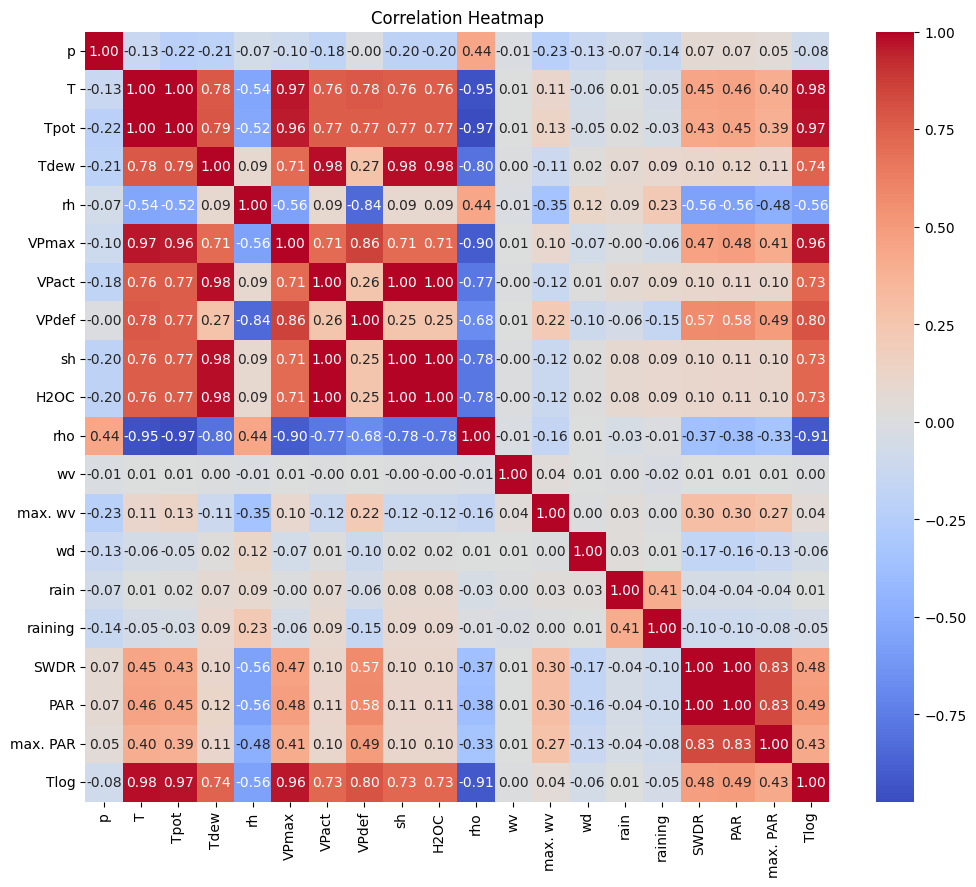

In [ ]:
# Correlation
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-33-8a5e8e75f19c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")


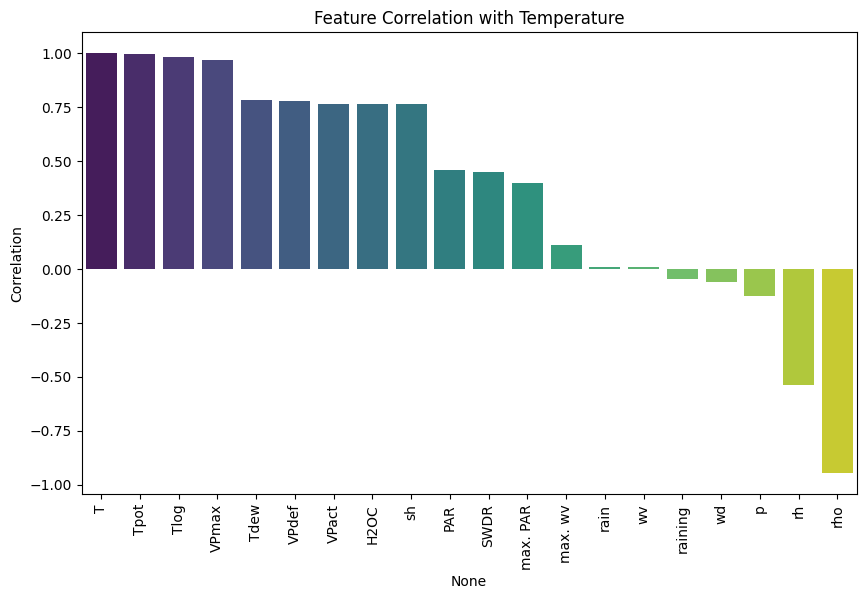

In [ ]:
# Correlation with the target
correlations = numeric_df.corr()['T'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Feature Correlation with Temperature")
plt.ylabel("Correlation")
plt.show()

In [ ]:
features = df.drop(columns=["date"])  # Exclude 'date' column
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Split into train-test
train_size = int(0.8 * len(scaled_features))
train_data = scaled_features[:train_size]
test_data = scaled_features[train_size:]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# # Drop 'date' column and select all features except 'T' as input features
features = df.drop(columns=["date", "T"])
target = df["T"].values

# Normalize features
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

scaled_features = scaler_features.fit_transform(features)
scaled_target = scaler_target.fit_transform(target.reshape(-1, 1)).flatten()

# Split into train-test
train_size = int(0.8 * len(scaled_features))
X_train, X_test = scaled_features[:train_size], scaled_features[train_size:]
y_train, y_test = scaled_target[:train_size], scaled_target[train_size:]

In [ ]:
# Reservoir Parameters
n_reservoir = 50
spectral_radius = 0.7
input_scaling = 0.3
ridge_alpha = 1e-3

# Reinitialize Reservoir
np.random.seed(42)
Win = (np.random.rand(n_reservoir, X_train.shape[1]) - 0.5) * input_scaling
W = np.random.rand(n_reservoir, n_reservoir) - 0.5
radius = max(abs(np.linalg.eigvals(W)))
W *= spectral_radius / radius

# Reservoir State Computation
def reservoir_state(data, W, Win):
    n_samples = data.shape[0]
    states = np.zeros((n_samples, n_reservoir))
    for t in range(1, n_samples):
        states[t] = np.tanh(np.dot(Win, data[t]) + np.dot(W, states[t-1]))
    return states

reservoir_train = reservoir_state(X_train, W, Win)
reservoir_test = reservoir_state(X_test, W, Win)

# Train Output Weights
ridge_reg = Ridge(alpha=ridge_alpha)
ridge_reg.fit(reservoir_train, y_train)
output_weights = ridge_reg.coef_

# Predict
y_pred = ridge_reg.predict(reservoir_test)

y_pred_original = scaler_target.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_target.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluate Model
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
print(f"Test MSE: {mse}")
print(f"R^2 Score: {r2}")

Test MSE: 0.020173872221661313
R^2 Score: 0.9991891253033003


In [ ]:
# Display Predicted vs Actual Temperatures
results_df = pd.DataFrame({
    "True Temperature": y_test_original[:20],  # first 20 values
    "Predicted Temperature": y_pred_original[:20]
})
print(results_df)

# results_df.to_csv("predicted_vs_true_temperatures.csv", index=False)

    True Temperature  Predicted Temperature
0               7.04              -3.784510
1               7.05               6.071852
2               6.97               6.503580
3               6.81               4.708171
4               6.82               6.116535
5               6.90               6.655181
6               6.57               6.513847
7               6.09               5.856457
8               5.84               5.796299
9               5.67               5.696496
10              5.10               5.029011
11              4.76               4.793264
12              5.09               5.207347
13              4.98               4.939126
14              4.85               4.740056
15              4.16               4.143096
16              3.81               3.824978
17              4.10               4.037860
18              4.06               3.920314
19              4.05               3.929822


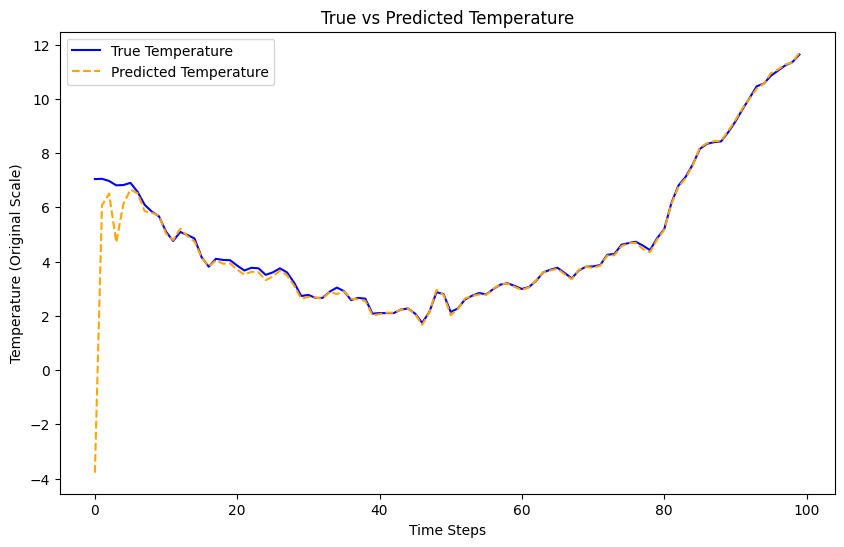

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_original[:100], label="True Temperature", color='blue')  # First 100 time steps
plt.plot(y_pred_original[:100], label="Predicted Temperature", color='orange', linestyle='dashed')
plt.xlabel("Time Steps")
plt.ylabel("Temperature (Original Scale)")
plt.title("True vs Predicted Temperature")
plt.legend()
plt.show()

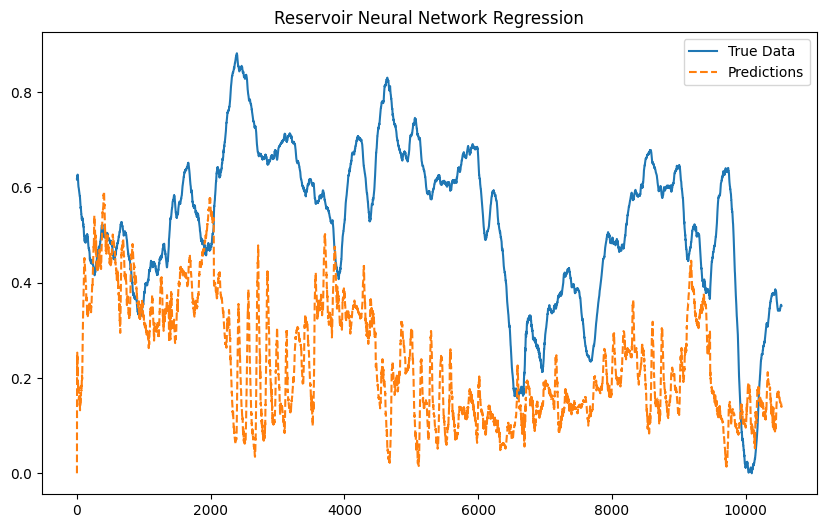

In [ ]:
predictions = np.dot(reservoir_test, output_weights.T)

plt.figure(figsize=(10, 6))
plt.plot(test_data[:, 0], label="True Data")
plt.plot(predictions, label="Predictions", linestyle='--')
plt.legend()
plt.title("Reservoir Neural Network Regression")
plt.show()